<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <style>
    h1 {
      background-color: #006494;
      color: white;
      text-align: center;
      border-radius: 10px;
    }
  </style>
</head>
<body>
  <h1>FEATURE ENGINEERING</h1>
</body>
</html>

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Feature Engineering Summary</title>
  <style>
    body {
      font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
      line-height: 1.6;
      margin: 0;
      padding: 2rem;
      background-color: #f4f4f4;
      color: #333;
    }
    .container {
      max-width: 800px;
      margin: 0 auto;
      background: white;
      padding: 2rem;
      border-radius: 8px;
      box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
    }
    h2 {
      color: #13293d; 
      border-bottom: 2px solid #eee;
      padding-bottom: 1rem;
      margin-bottom: 2rem;
    }
    h3 {
      color: #333;
      margin-top: 2rem;
    }
    p {
      margin-bottom: 1rem;
    }
    ul {
      margin-bottom: 1.5rem;
      list-style-type: disc;
      margin-left: 2rem;
    }
    strong {
      font-weight: 600;
    }
    code {
      background-color: #eee;
      padding: 0.2rem 0.4rem;
      border-radius: 4px;
      font-family: 'Courier New', Courier, monospace;
    }
  </style>
</head>
<body>
  <div class="container">
    <h2>Feature Engineering Summary</h2>
    <p>This document summarizes the feature engineering steps applied to the customer dataset.</p>
    <h3>Age Calculation</h3>
    <p>Calculated customer age by subtracting their birth year from 2024.</p>
    <h3>Total Spending</h3>
    <p>Created a <code>Spent</code> feature representing the total spending across all product categories (wines, fruits, meat, fish, sweets, gold products).</p>
    <h3>Children Count</h3>
    <p>Combined <code>Kidhome</code> and <code>Teenhome</code> to create a <code>Children</code> feature representing the total number of children.</p>
    <h3>Living Arrangement</h3>
    <p>Simplified <code>Marital_Status</code> into two categories:</p>
    <ul>
      <li><strong>1:</strong> "Married" and "Together".</li>
      <li><strong>0:</strong> "Single", "Divorced", "Widow", "YOLO", "Absurd".</li>
    </ul>
    <h3>Family Size</h3>
    <p>Calculated <code>Family_Size</code> by adding 1 (representing the customer) to the <code>Living_With</code> status and the number of <code>Children</code>.</p>
    <h3>Parent Identification</h3>
    <p>Created a binary feature <code>Is_Parent</code> (1 if the customer has children, 0 otherwise).</p>
    <h3>Customer Duration</h3>
    <p>Introduced the <code>customer_for</code> feature to indicate how long a customer has been with the business, derived from their registration date. This enables analysis of:</p>
    <ul>
      <li>Customer segmentation (new, loyal, long-term).</li>
      <li>Enhanced K-Means Clustering using Recency, Frequency, and Monetary (RFM) analysis.</li>
    </ul>
    <h3>Redundant Feature Removal</h3>
    <p>Removed original features that became redundant after creating the new engineered features.</p> 
  </div>
  <br>
</body>
</html>


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import colors

In [40]:
data_path = './data/cleaned_data.csv'
data = pd.read_csv(data_path)

In [41]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000) 

In [42]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2208,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2209,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2210,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [43]:
max_date = pd.to_datetime(data['Dt_Customer'].max())
max_date

Timestamp('2014-06-29 00:00:00')

In [44]:
data['Age'] = 2014 - data['Year_Birth']

data['Spent'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

data['Children'] = data['Kidhome'] + data['Teenhome']

data['Living_With'] = data['Marital_Status'].apply(lambda x: 1 if x in ['Married', 'Together'] else 0)

data['Customer_For'] = (max_date - pd.to_datetime(data["Dt_Customer"], errors="coerce")).dt.days

data['Family_Size'] = data['Living_With'] + 1 + data['Children']

data['Is_Parent'] = np.where(data['Children'] > 0, 1, 0)

education_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']
education_mapping = {education: order for order, education in enumerate(education_order)}
data["Education"] = data["Education"].map(education_mapping)

In [45]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Children,Living_With,Customer_For,Family_Size,Is_Parent
0,5524,1957,2,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57,1617,0,0,663,1,0
1,2174,1954,2,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,27,2,0,113,3,1
2,4141,1965,2,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49,776,0,1,312,2,0
3,6182,1984,2,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,53,1,1,139,3,1
4,5324,1981,4,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,422,1,1,161,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,10870,1967,2,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,47,1341,1,1,381,3,1
2208,4001,1946,4,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,68,444,3,1,19,5,1
2209,7270,1981,2,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,33,1241,0,0,155,1,0
2210,8235,1956,3,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,58,843,1,1,156,3,1


In [46]:
data.describe()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Children,Living_With,Customer_For,Family_Size,Is_Parent
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.0,2212.0,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,5585.160940,1968.913653,2.460669,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,2.324593,4.088156,2.672242,5.806510,5.321429,0.073689,0.074141,0.072785,0.064195,0.013562,0.009042,3.0,11.0,0.150542,45.086347,607.268083,0.947559,0.645570,353.714286,2.593128,0.714286
std,3247.523735,11.701599,1.004193,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,1.924507,2.742187,2.927542,3.250939,2.425597,0.261323,0.262060,0.259842,0.245156,0.115691,0.094678,0.0,0.0,0.357683,11.701599,602.513364,0.749466,0.478449,202.494886,0.906236,0.451856
min,0.000000,1940.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,18.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2814.750000,1959.000000,2.000000,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,37.000000,69.000000,0.000000,0.000000,180.000000,2.000000,0.000000
50%,5454.500000,1970.000000,2.000000,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,44.000000,397.000000,1.000000,1.000000,356.000000,3.000000,1.000000
75%,8418.500000,1977.000000,3.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,55.000000,1048.000000,1.000000,1.000000,529.000000,3.000000,1.000000
max,11191.000000,1996.000000,4.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,74.000000,2525.000000,3.000000,1.000000,699.000000,5.000000,1.000000


In [47]:
data = data.drop(['Year_Birth', 'Marital_Status', 'Dt_Customer', 'Z_Revenue', 'Z_CostContact'], axis=1)

In [48]:
data

,ID,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Living_With,Customer_For,Family_Size,Is_Parent
0,5524,2,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,1617,0,0,663,1,0
1,2174,2,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,27,2,0,113,3,1
2,4141,2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,776,0,1,312,2,0
3,6182,2,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,53,1,1,139,3,1
4,5324,4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,422,1,1,161,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,10870,2,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,47,1341,1,1,381,3,1
2208,4001,4,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,68,444,3,1,19,5,1
2209,7270,2,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,33,1241,0,0,155,1,0
2210,8235,3,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,58,843,1,1,156,3,1


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

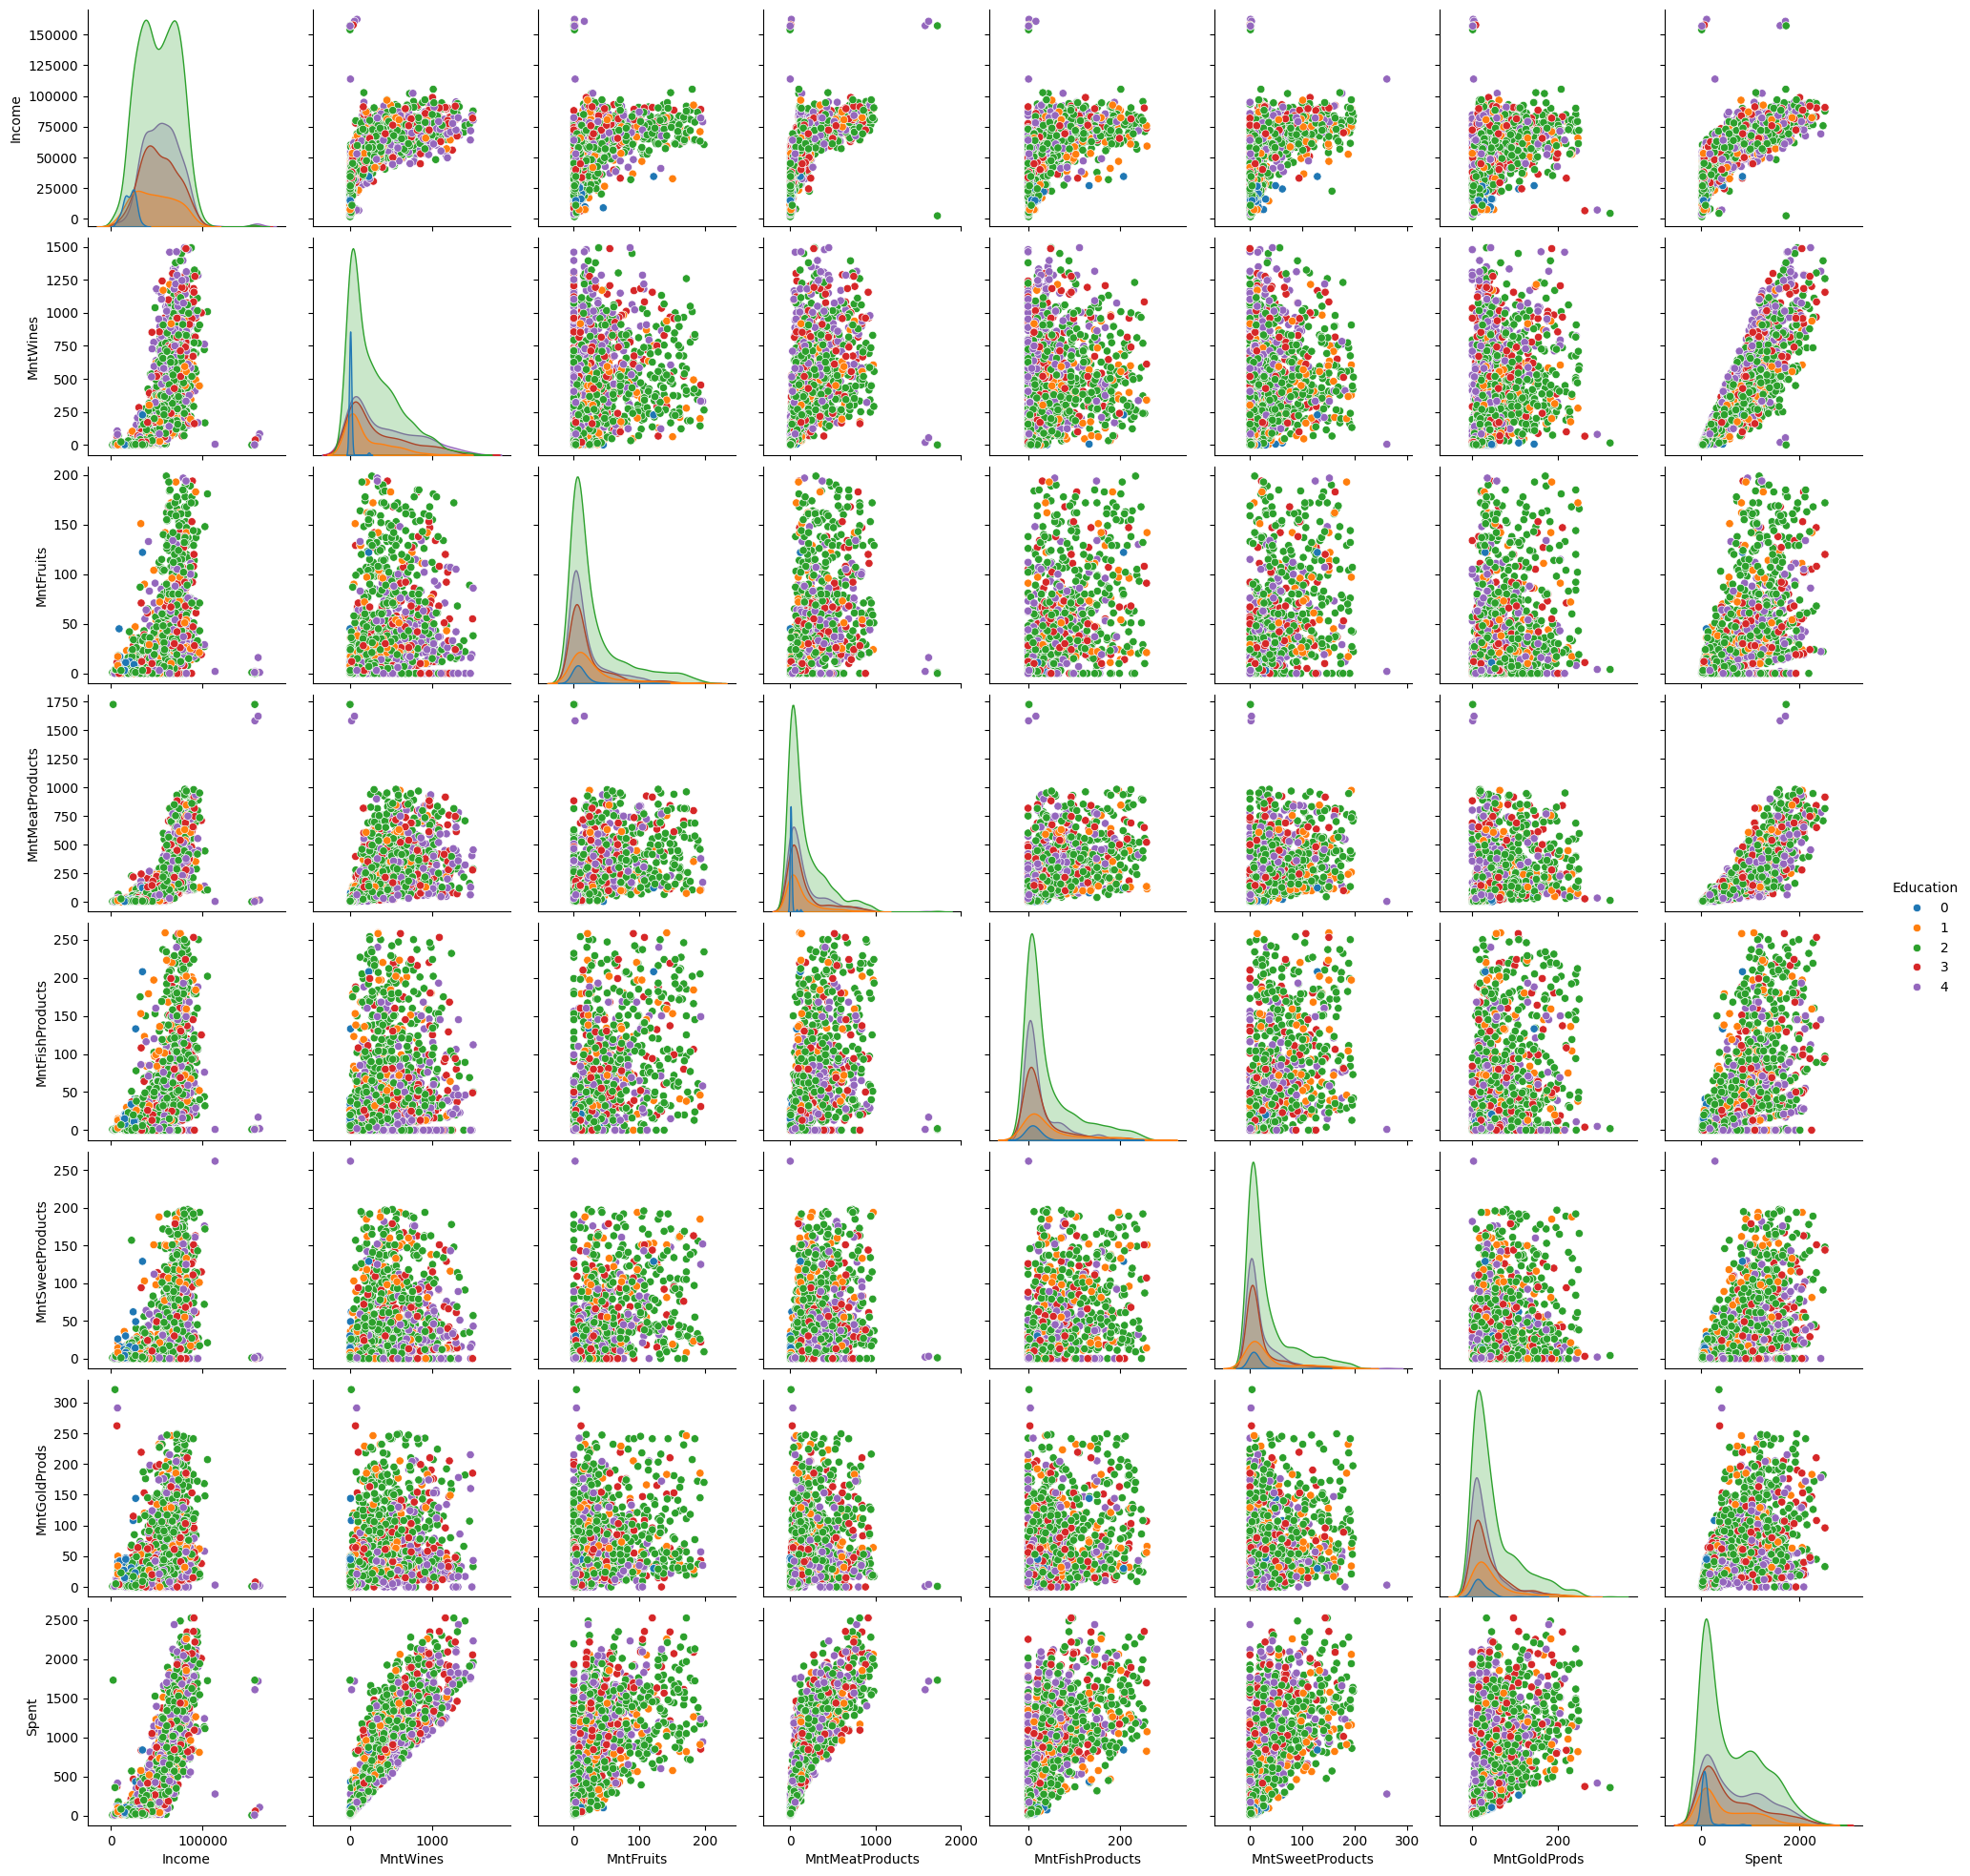

In [49]:
unique = data["Education"].nunique()
palette = sns.color_palette("tab10",unique)
To_Plot = ["Income", "MntWines", "MntFruits", "MntMeatProducts", 
           "MntFishProducts", "MntSweetProducts", "MntGoldProds", "Education", "Spent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue="Education", palette=palette)
plt.show()

In [50]:
def plot_boxplot(data, x_col, y_col):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=x_col, y=y_col, data=data, palette='Set2', hue=x_col, dodge=False)
    plt.title(f'{y_col} vs {x_col}', fontsize=14)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend([], [], frameon=False)
    plt.show()

<Axes: >

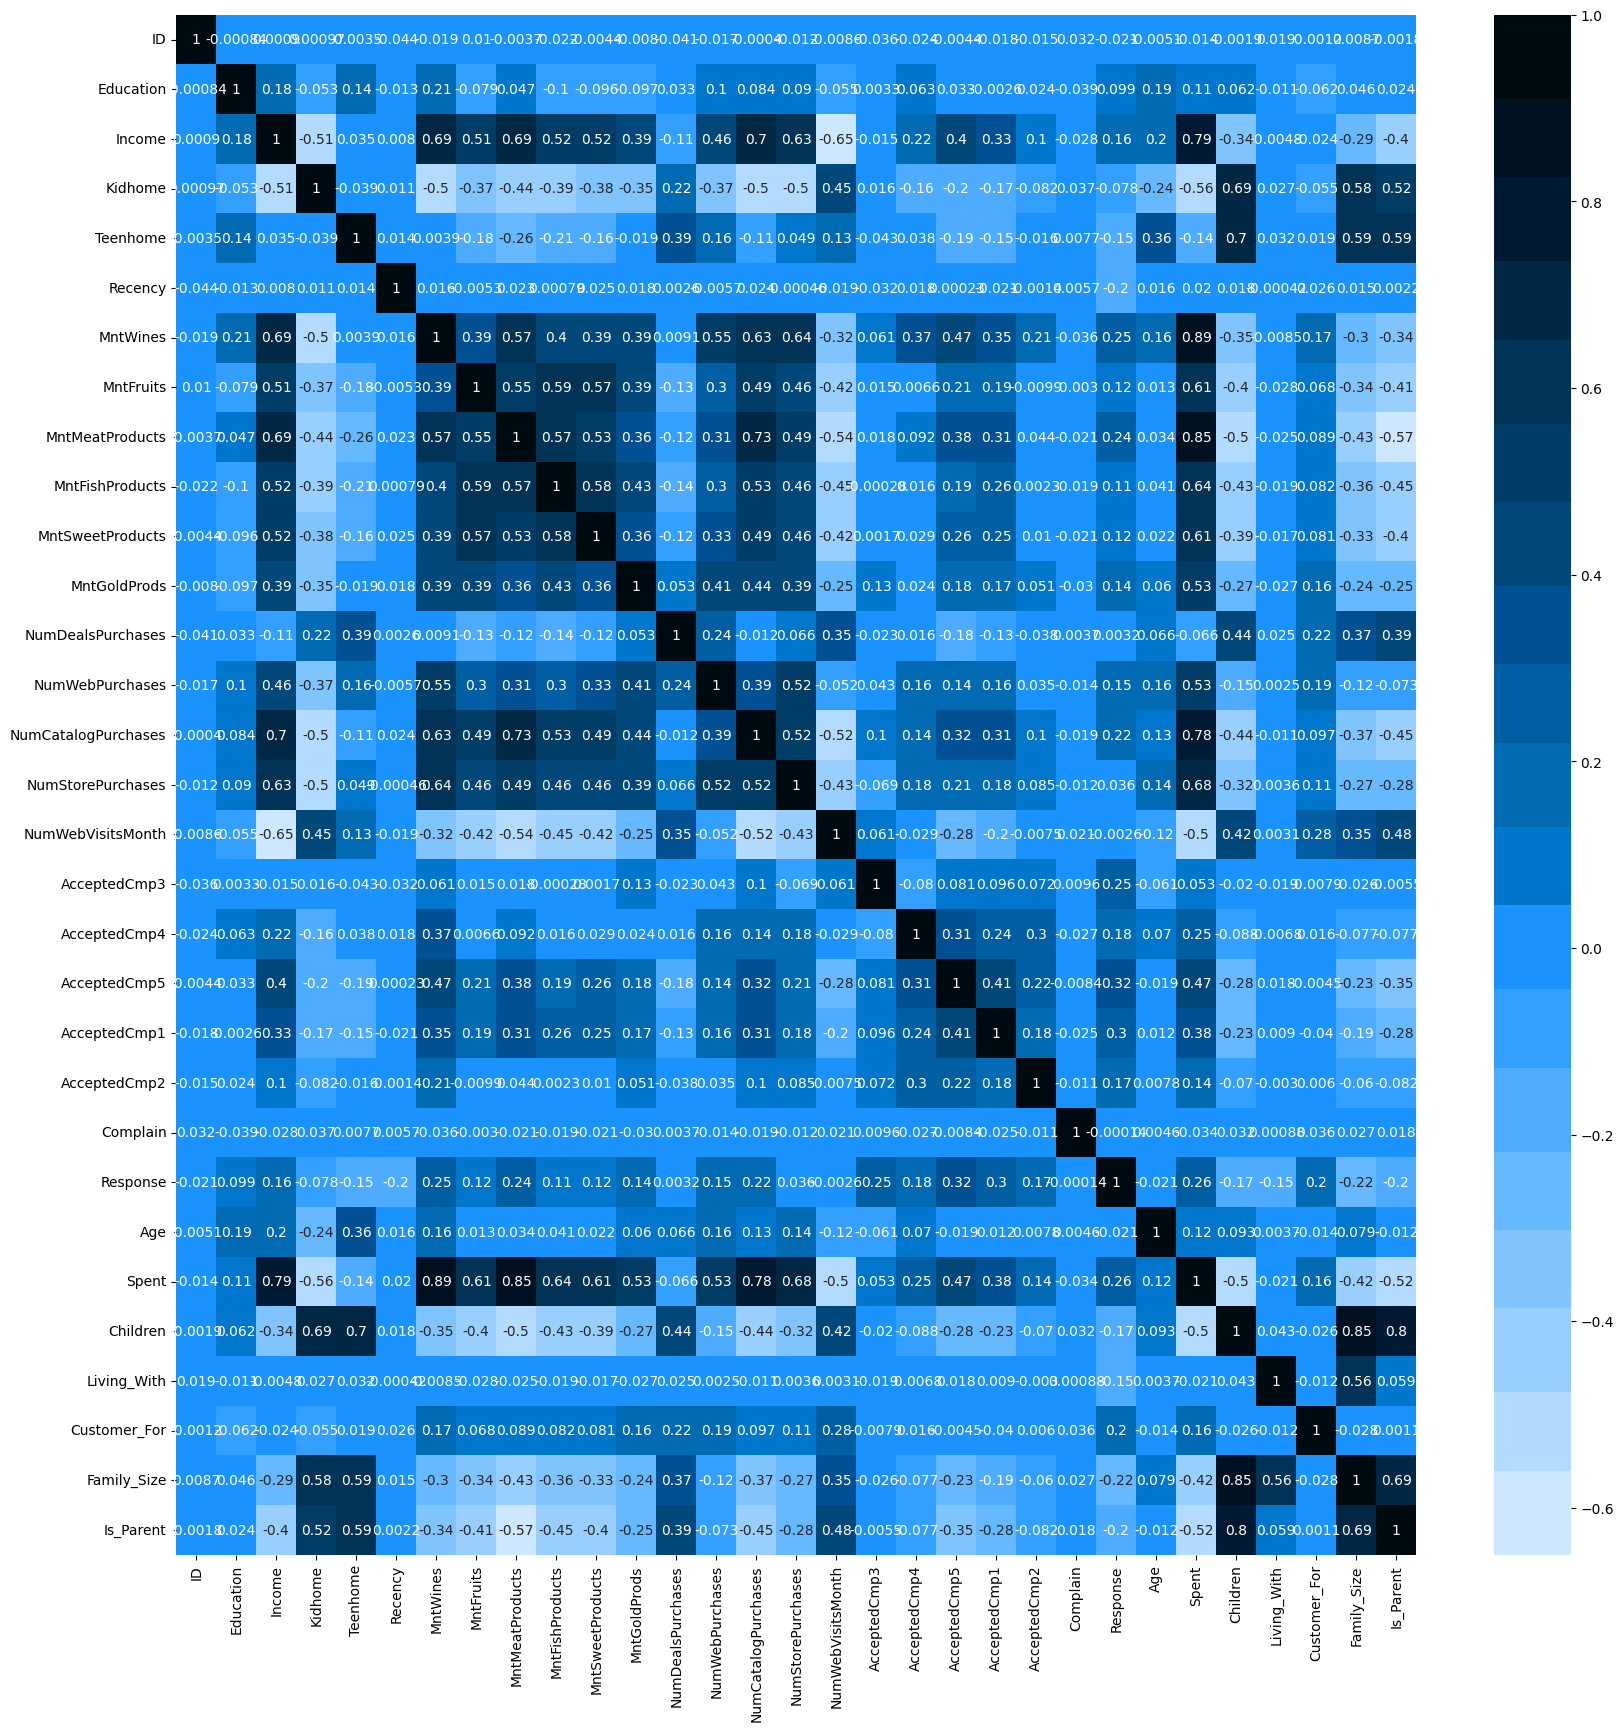

In [51]:
cmap = colors.ListedColormap([
    "#ffffff", "#f0f8ff", "#e6f2ff", "#dcecff", "#cce7ff", "#b3dbff",
    "#99cfff", "#80c4ff", "#66b8ff", "#4dacff", "#339fff", "#1a93ff",
    "#0077cc", "#006bb3", "#005fa3", "#005093", "#00477a", "#003d66",
    "#003355", "#002844", "#001a33", "#001122", "#000a11"
])
corrmat= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [52]:
data

,ID,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Living_With,Customer_For,Family_Size,Is_Parent
0,5524,2,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,1617,0,0,663,1,0
1,2174,2,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,27,2,0,113,3,1
2,4141,2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,776,0,1,312,2,0
3,6182,2,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,53,1,1,139,3,1
4,5324,4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,422,1,1,161,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,10870,2,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,47,1341,1,1,381,3,1
2208,4001,4,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,68,444,3,1,19,5,1
2209,7270,2,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,33,1241,0,0,155,1,0
2210,8235,3,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,58,843,1,1,156,3,1


In [53]:
data.to_csv('./data/feature_data.csv', index = False)